In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '..')
import ccal

%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

================= Computational Cancer Analysis Library (CCAL) =================
Planted a random seed: 20121020.


# Test with real data

## Define states

<230010> Loading distances between samples already computed ...
<230010> Consensus clustering with 30 clusterings ...
<230010> k=12 ...
<230010> 	Permuting distance matrix with repeat and clustering (0/30) ...
<230010> 	Permuting distance matrix with repeat and clustering (10/30) ...
<230010> 	Permuting distance matrix with repeat and clustering (20/30) ...
<230010> 	Making consensus matrix from 30 hierarchical clusterings of randomized distance matrix ...


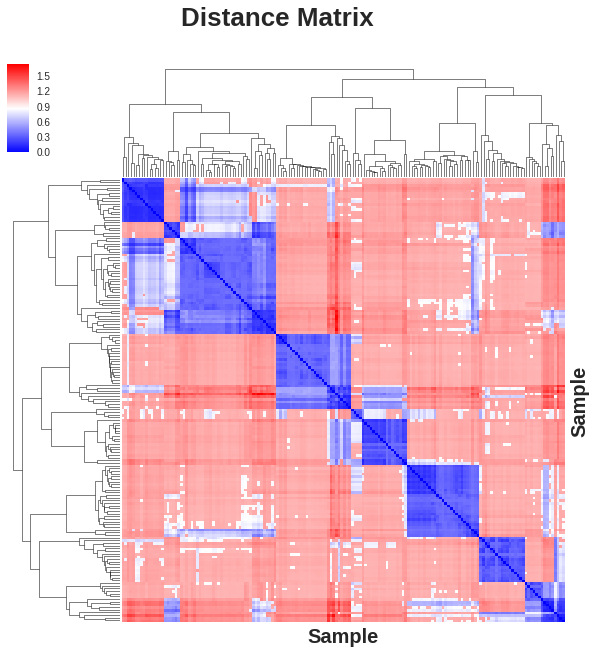

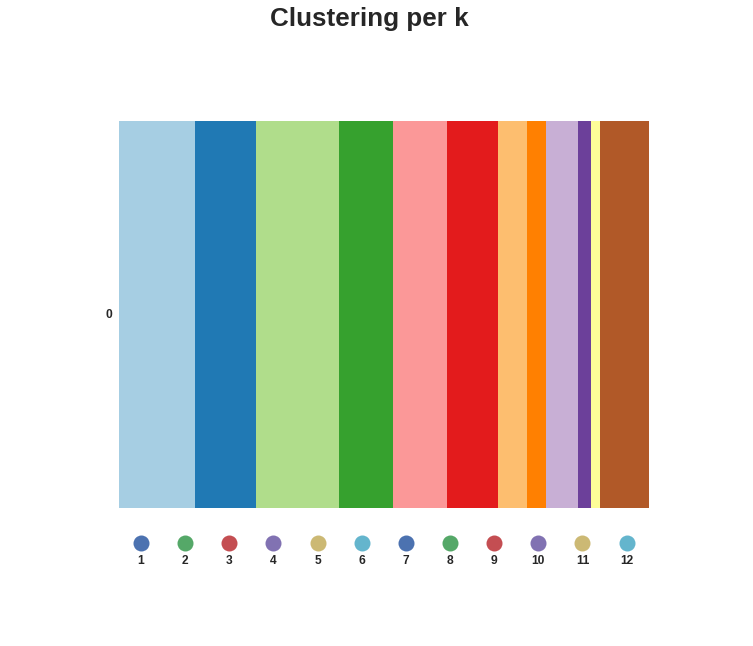

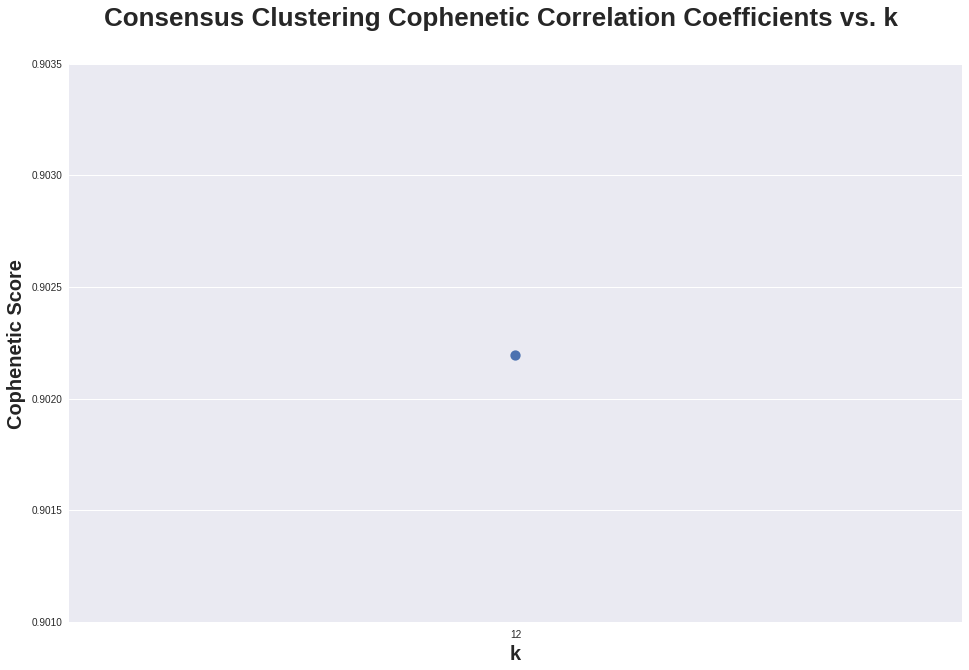

In [2]:
h = ccal.support.read_gct('data/hema_k9_H.gct')
ks = [12]
# distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
#                                                                            ks,
#                                                                            n_clusterings=30,
#                                                                            max_std=5,
#                                                                            directory_path='result/define_states/')
distance_matrix, clusterings, cophenetic_correlations = ccal.define_states(h,
                                                                                 ks,
                                                                                 distance_matrix=ccal.read_gct('data/hema_k9_distance_matrix.gct'),
                                                                                 n_clusterings=30,
                                                                                 max_std=5)
state_labels = clusterings.ix[12, :]

## Make Onco-GPS

# Test with random data

## Make Onco-GPS

# Project samples

<230012> Training Onco-GPS with 9 components, 166 samples, and 12 states ...
<230012> 	Components: {'nmf_compC4_9', 'nmf_compC8_9', 'nmf_compC9_9', 'nmf_compC6_9', 'nmf_compC5_9', 'nmf_compC7_9', 'nmf_compC1_9', 'nmf_compC2_9', 'nmf_compC3_9'}
<230012> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
<230012> Computing component coordinates using informational distance ...
<230012> Computing associations (axis=1) between matrices (0/9) ...
<230012> Computing associations (axis=1) between matrices (1/9) ...
<230012> Computing associations (axis=1) between matrices (2/9) ...
<230012> Computing associations (axis=1) between matrices (3/9) ...
<230012> Computing associations (axis=1) between matrices (4/9) ...
<230012> Computing associations (axis=1) between matrices (5/9) ...
<230012> Computing associations (axis=1) between matrices (6/9) ...
<230012> Computing associations (axis=1) between matrices (7/9) ...
<230012> Computing associations (axis=1) between matrices (8/9) ...
<23

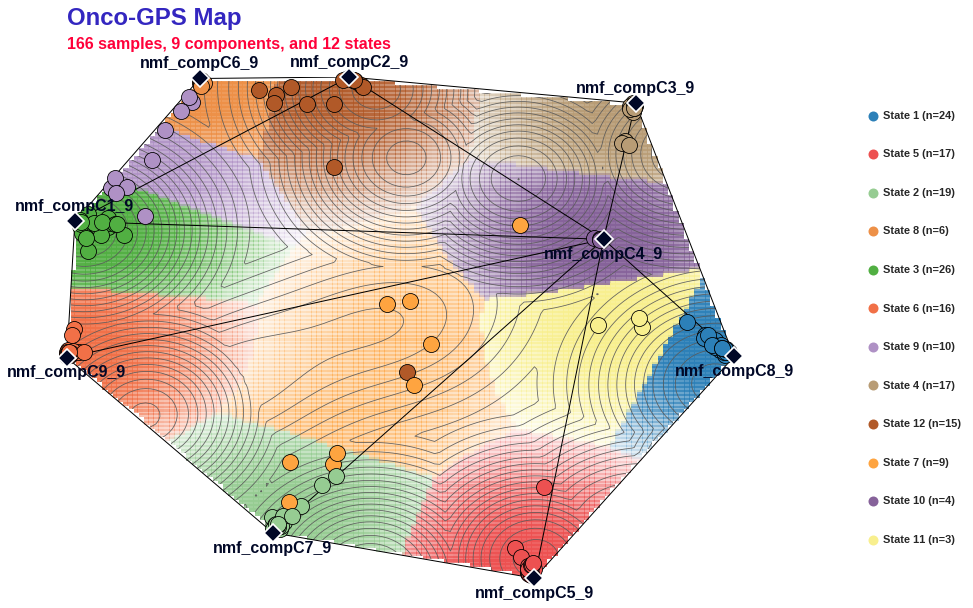

In [3]:
r1 = ccal.make_oncogps_map(h, state_labels, testing_h=h, testing_states=state_labels)

<230116> Training Onco-GPS with 9 components, 166 samples, and 12 states ...
<230116> 	Components: {'nmf_compC4_9', 'nmf_compC8_9', 'nmf_compC9_9', 'nmf_compC6_9', 'nmf_compC5_9', 'nmf_compC7_9', 'nmf_compC1_9', 'nmf_compC2_9', 'nmf_compC3_9'}
<230116> 	Training states: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
<230116> Computing component coordinates using informational distance ...
<230116> Computing associations (axis=1) between matrices (0/9) ...
<230116> Computing associations (axis=1) between matrices (1/9) ...
<230116> Computing associations (axis=1) between matrices (2/9) ...
<230116> Computing associations (axis=1) between matrices (3/9) ...
<230116> Computing associations (axis=1) between matrices (4/9) ...
<230116> Computing associations (axis=1) between matrices (5/9) ...
<230116> Computing associations (axis=1) between matrices (6/9) ...
<230116> Computing associations (axis=1) between matrices (7/9) ...
<230116> Computing associations (axis=1) between matrices (8/9) ...
<23

(                     x         y
 nmf_compC1_9  0.012046  0.711975
 nmf_compC2_9  0.423552  1.000000
 nmf_compC3_9  0.852276  0.948114
 nmf_compC4_9  0.804395  0.676180
 nmf_compC5_9  0.700859  0.000000
 nmf_compC6_9  0.199174  0.997026
 nmf_compC7_9  0.308713  0.090773
 nmf_compC8_9  1.000000  0.442469
 nmf_compC9_9  0.000000  0.440363,
                                                   x         y  state  \
 A3KAW_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE   0.972600  0.468026      1   
 A4FUK_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE   0.986365  0.453412      1   
 ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.692838  0.007296      5   
 AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.313104  0.099380      2   
 AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0.987781  0.447394      1   
 BCP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0.955412  0.479053      1   
 BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0.200162  0.989336      8   
 BL41_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE    0.035191  0.700886      3   
 B

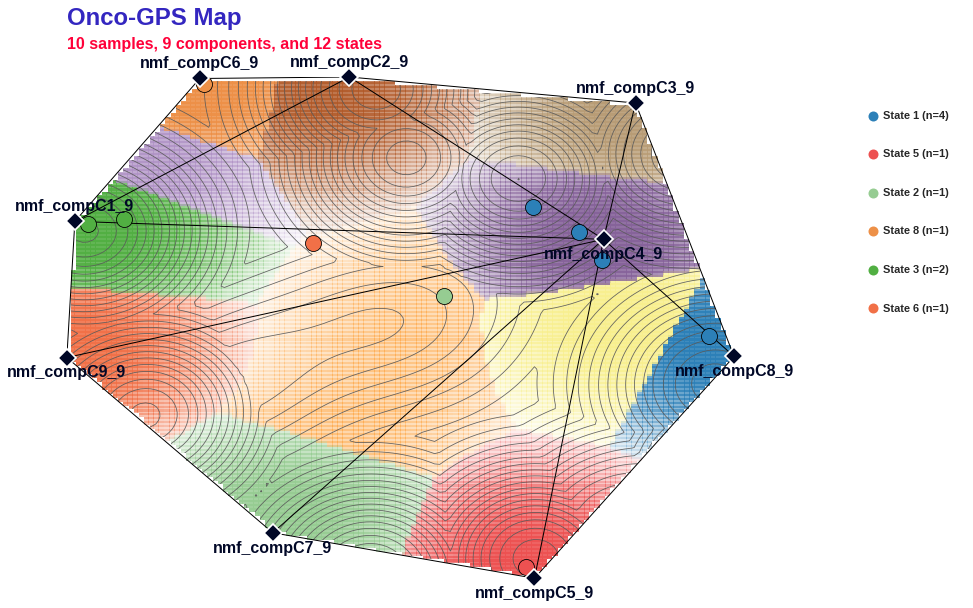

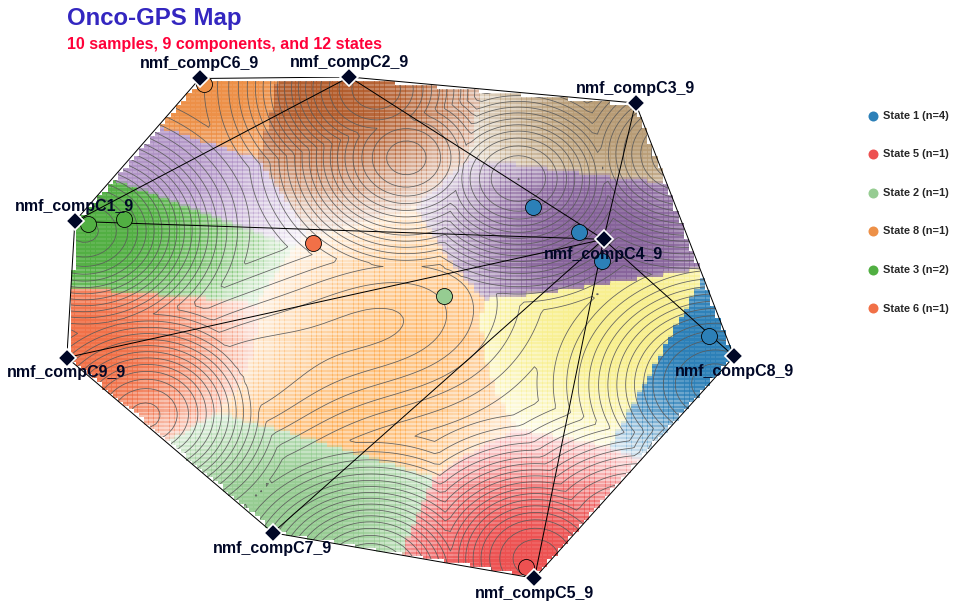

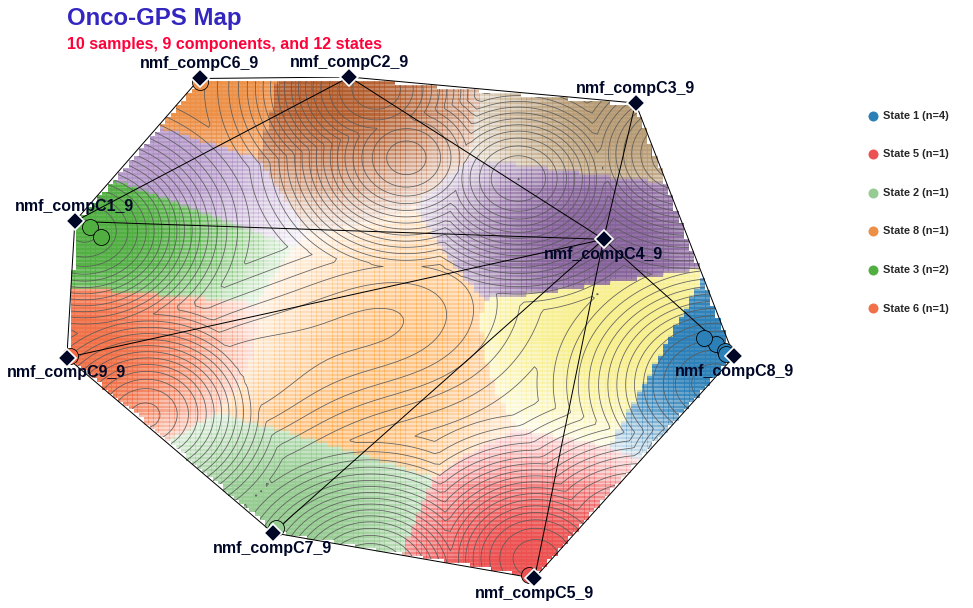

In [5]:
n = 10
ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n], testing_h_normalization='using_training')
ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n], testing_h_normalization='as_training')
ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n], testing_h_normalization=None)

try:
    ccal.make_oncogps_map(h, state_labels, testing_h=h.iloc[:, :n], testing_states=state_labels[:n], testing_h_normalization='foo')
except ValueError:
    pass